In [3]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import requests
from bs4 import BeautifulSoup


stock_code = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0] 

stock_code = stock_code[['회사명', '종목코드']]

stock_code = stock_code.rename(columns={'회사명': 'company', '종목코드': 'code'}) 
stock_code.code = stock_code.code.map('{:06d}'.format)

company='삼성전자' 
code = stock_code[stock_code.company==company].code.values[0].strip() ## strip() : 공백제거
count = 0
df = pd.DataFrame()
for page in range(1,100):
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code)     
    url = '{url}&page={page}'.format(url=url, page=page)
    #print(url)
    header = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36'} 
    res = requests.get(url,headers=header)
    #print(res.status_code)
    


    #if res.status_code != 200 : break
    
    
    dft = pd.read_html(res.text, header=0)[0]
    dft = dft.dropna() 
   
    
    print(dft.head())
    
    #df = pd.merge(df,dft, how = 'outer', on = '날짜')
    df = pd.concat([dft,df], ignore_index = True)
    #print(df.head())
    #df = df.append(pd.read_html(url, header=0)[0], ignore_index=True)

print(df)

#df.dropna()를 이용해 결측값 있는 행 제거 
df = df.dropna() 
df = df.drop(df.columns[2],axis =1)
# 한글로 된 컬럼명을 영어로 바꿔줌 
df = df.rename(columns= {'날짜': 'date', '종가': 'close', '시가': 'open', '고가': 'high', '저가': 'low', '거래량': 'volume'}) 
# 데이터의 타입을 int형으로 바꿔줌 
df[['close', 'open', 'high', 'low', 'volume']] = df[['close',  'open', 'high', 'low', 'volume']].astype(int) 

# 컬럼명 'date'의 타입을 date로 바꿔줌 
df['date'] = pd.to_datetime(df['date']) 

df = df.sort_values(by=['date'], ascending=False) 
import matplotlib.pyplot as plt
# 필요한 모듈 import 하기 
import plotly
import plotly.graph_objects as go
import plotly.express as px
# %matplotlib inline 은 jupyter notebook 사용자용 - jupyter notebook 내에 그래프가 그려지게 한다.
%matplotlib inline 

           날짜       종가        전일비       시가       고가       저가         거래량
1  2024.05.28  77600.0    상승  400  76500.0  78000.0  76200.0  17907848.0
2  2024.05.27  77200.0  상승  1,300  75300.0  78200.0  74000.0  43825202.0
3  2024.05.24  75900.0  하락  2,400  76800.0  77000.0  75700.0  27891278.0
4  2024.05.23  78300.0    상승  600  77700.0  79100.0  77100.0  18728087.0
5  2024.05.22  77700.0    하락  700  78100.0  78700.0  77300.0  19521506.0
           날짜       종가        전일비       시가       고가       저가         거래량
1  2024.05.13  78400.0    하락  800  79400.0  79900.0  77600.0  18652344.0
2  2024.05.10  79200.0    하락  500  80400.0  81100.0  78900.0  16976124.0
3  2024.05.09  79700.0  하락  1,600  81100.0  81500.0  79700.0  18759935.0
4  2024.05.08  81300.0        보합0  80800.0  81400.0  80500.0  13089576.0
5  2024.05.07  81300.0  상승  3,700  79600.0  81300.0  79400.0  26238868.0
           날짜       종가        전일비       시가       고가       저가         거래량
1  2024.04.25  76300.0  하락  2,300  77300.0  77500.0

           날짜       종가        전일비       시가       고가       저가         거래량
1  2023.08.14  67300.0    하락  200  67500.0  67900.0  66900.0   9352343.0
2  2023.08.11  67500.0    하락  500  68400.0  68800.0  67500.0   9781038.0
3  2023.08.10  68000.0    하락  900  68300.0  68500.0  67800.0  10227311.0
4  2023.08.09  68900.0  상승  1,300  68000.0  69600.0  67900.0  17259673.0
5  2023.08.08  67600.0    하락  900  69000.0  69100.0  67400.0  14664709.0
           날짜       종가        전일비       시가       고가       저가         거래량
1  2023.07.31  69800.0    하락  800  70900.0  71000.0  69800.0  13035420.0
2  2023.07.28  70600.0  하락  1,100  71800.0  72400.0  70100.0  19420683.0
3  2023.07.27  71700.0  상승  1,900  69900.0  71700.0  69300.0  24261179.0
4  2023.07.26  69800.0    하락  200  69800.0  70600.0  68100.0  30016221.0
5  2023.07.25  70000.0    하락  400  70000.0  70500.0  69800.0  14314945.0
           날짜       종가        전일비       시가       고가       저가         거래량
1  2023.07.17  73300.0    하락  100  73200.0  73500.0

           날짜       종가        전일비       시가       고가       저가         거래량
1  2022.11.09  62000.0    상승  200  62000.0  62200.0  61300.0  14045592.0
2  2022.11.08  61800.0  상승  1,600  60500.0  61900.0  60500.0  18273898.0
3  2022.11.07  60200.0    상승  800  59700.0  60300.0  59400.0  12437246.0
4  2022.11.04  59400.0    상승  200  59100.0  59500.0  58400.0  12445841.0
5  2022.11.03  59200.0    하락  400  58600.0  59800.0  58100.0  17492162.0
           날짜       종가        전일비       시가       고가       저가         거래량
1  2022.10.26  59400.0  상승  1,700  58000.0  59600.0  57700.0  20824967.0
2  2022.10.25  57700.0    상승  200  57000.0  58600.0  57000.0  17405678.0
3  2022.10.24  57500.0  상승  1,600  57000.0  57500.0  56700.0  16944503.0
4  2022.10.21  55900.0    상승  400  55100.0  56300.0  55100.0  11456060.0
5  2022.10.20  55500.0    하락  300  55200.0  56000.0  55100.0  17107653.0
           날짜       종가      전일비       시가       고가       저가         거래량
1  2022.10.12  55800.0  상승  400  55700.0  57000.0  55

           날짜       종가        전일비       시가       고가       저가         거래량
1  2022.01.14  77300.0    하락  600  77700.0  78100.0  77100.0  10096725.0
2  2022.01.13  77900.0  하락  1,000  79300.0  79300.0  77900.0  13889401.0
3  2022.01.12  78900.0        보합0  79500.0  79600.0  78600.0  11000502.0
4  2022.01.11  78900.0    상승  900  78400.0  79000.0  78000.0  13221123.0
5  2022.01.10  78000.0    하락  300  78100.0  78100.0  77100.0   9947422.0
           날짜       종가        전일비       시가       고가       저가         거래량
1  2021.12.30  78300.0    하락  500  78900.0  79500.0  78100.0  14236700.0
2  2021.12.29  78800.0  하락  1,500  80200.0  80200.0  78500.0  19794795.0
3  2021.12.28  80300.0    상승  100  80200.0  80400.0  79700.0  18226325.0
4  2021.12.27  80200.0    하락  300  80600.0  80600.0  79800.0  10783368.0
5  2021.12.24  80500.0    상승  600  80200.0  80800.0  80200.0  12086380.0
           날짜       종가        전일비       시가       고가       저가         거래량
1  2021.12.16  77800.0    상승  200  78500.0  78500.0

           날짜       종가        전일비       시가       고가       저가         거래량
1  2021.04.12  83200.0    하락  400  84100.0  84100.0  83100.0  12915282.0
2  2021.04.09  83600.0  하락  1,100  84700.0  84900.0  83400.0  18193707.0
3  2021.04.08  84700.0    하락  900  85700.0  85700.0  84100.0  19244259.0
4  2021.04.07  85600.0    하락  400  86100.0  86200.0  85400.0  17885538.0
5  2021.04.06  86000.0    상승  600  86200.0  86200.0  85100.0  19042023.0
           날짜       종가      전일비       시가       고가       저가         거래량
1  2021.03.29  81600.0  상승  100  81700.0  81700.0  81000.0  14952134.0
2  2021.03.26  81500.0  상승  300  81400.0  81600.0  81000.0  12845778.0
3  2021.03.25  81200.0  상승  200  81000.0  82100.0  80800.0  14758826.0
4  2021.03.24  81000.0  하락  800  81000.0  81600.0  80700.0  17926638.0
5  2021.03.23  81800.0  하락  200  82600.0  82900.0  81800.0  13299907.0
           날짜       종가        전일비       시가       고가       저가         거래량
1  2021.03.15  81800.0  하락  1,000  82800.0  82900.0  81800.0  1

           날짜       종가      전일비       시가       고가       저가         거래량
1  2020.07.03  53600.0  상승  700  53000.0  53600.0  52700.0  11887868.0
2  2020.07.02  52900.0  상승  300  52100.0  52900.0  52100.0  14142583.0
3  2020.07.01  52600.0  하락  200  53400.0  53600.0  52400.0  16706143.0
4  2020.06.30  52800.0  상승  400  53900.0  53900.0  52800.0  21157172.0
5  2020.06.29  52400.0  하락  900  52500.0  53200.0  52000.0  17776925.0
           날짜       종가        전일비       시가       고가       저가         거래량
1  2020.06.19  52900.0    상승  600  52600.0  52900.0  51600.0  18157985.0
2  2020.06.18  52300.0    상승  100  52200.0  52300.0  51600.0  15982926.0
3  2020.06.17  52200.0    상승  100  52100.0  52900.0  51300.0  26672595.0
4  2020.06.16  52100.0  상승  2,200  51200.0  52100.0  50600.0  21808375.0
5  2020.06.15  49900.0  하락  2,400  51400.0  52000.0  49900.0  28772921.0
           날짜       종가        전일비       시가       고가       저가         거래량
1  2020.06.05  55500.0    상승  900  54400.0  55900.0  54000.0  2

In [4]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
data = df
price  = data[['close']]

scaler = MinMaxScaler(feature_range = (-1,1))
price['close'] =scaler.fit_transform(price['close'].values.reshape(-1,1))

<ipython-input-4-3d19428751aa>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price['close'] =scaler.fit_transform(price['close'].values.reshape(-1,1))


In [5]:
len(price)*0.2

198.0

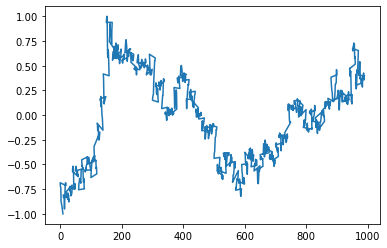

In [6]:
plt.plot(price)

In [36]:
def split_data(stock, lookback):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback): 
        data.append(data_raw[index: index + lookback])
    
    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    
    return [x_train, y_train, x_test, y_test]

#lookback = int(len(data)*0.2) # choose sequence length
lookback = int(len(data)*0.1)
x_train, y_train, x_test, y_test = split_data(price, lookback)

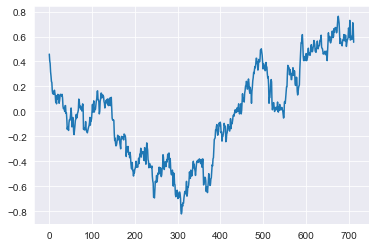

In [37]:
plt.plot(y_train)

In [38]:
import torch
import torch.nn as nn
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)
y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor)
y_train_blstm = torch.from_numpy(y_train).type(torch.Tensor)
y_test_blstm = torch.from_numpy(y_test).type(torch.Tensor)

In [39]:
# for lstm
input_dim = 1
hidden_dim = 32 # <--???? 
num_layers = 2
output_dim = 1
num_epochs = 100

In [40]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [41]:
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [42]:
import time
hist = np.zeros(num_epochs)
start_time = time.time()
lstm = []
for t in range(num_epochs):
    y_train_pred = model(x_train)
    loss = criterion(y_train_pred, y_train_lstm)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    
training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.1720302402973175
Epoch  1 MSE:  0.1395057737827301
Epoch  2 MSE:  0.13825301826000214
Epoch  3 MSE:  0.12066573649644852
Epoch  4 MSE:  0.10208912938833237
Epoch  5 MSE:  0.07938846200704575
Epoch  6 MSE:  0.03364720940589905
Epoch  7 MSE:  0.1059960350394249
Epoch  8 MSE:  0.027398737147450447
Epoch  9 MSE:  0.048041317611932755
Epoch  10 MSE:  0.04417778551578522
Epoch  11 MSE:  0.031090660020709038
Epoch  12 MSE:  0.024076737463474274
Epoch  13 MSE:  0.023785825818777084
Epoch  14 MSE:  0.02647235058248043
Epoch  15 MSE:  0.02720818668603897
Epoch  16 MSE:  0.022968849167227745
Epoch  17 MSE:  0.015724334865808487
Epoch  18 MSE:  0.011862116865813732
Epoch  19 MSE:  0.01536034420132637
Epoch  20 MSE:  0.0185974333435297
Epoch  21 MSE:  0.015688451007008553
Epoch  22 MSE:  0.01129934098571539
Epoch  23 MSE:  0.008957507088780403
Epoch  24 MSE:  0.008581386879086494
Epoch  25 MSE:  0.00912140030413866
Epoch  26 MSE:  0.009775204584002495
Epoch  27 MSE:  0.010107397101

In [43]:
#predict = pd.DataFrame(y_train_pred.detach().numpy())
#original = pd.DataFrame(y_train_lstm.detach().numpy())

predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_lstm.detach().numpy()))

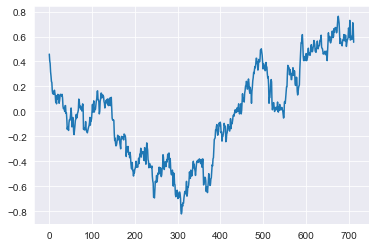

In [44]:
plt.plot(y_train_lstm)

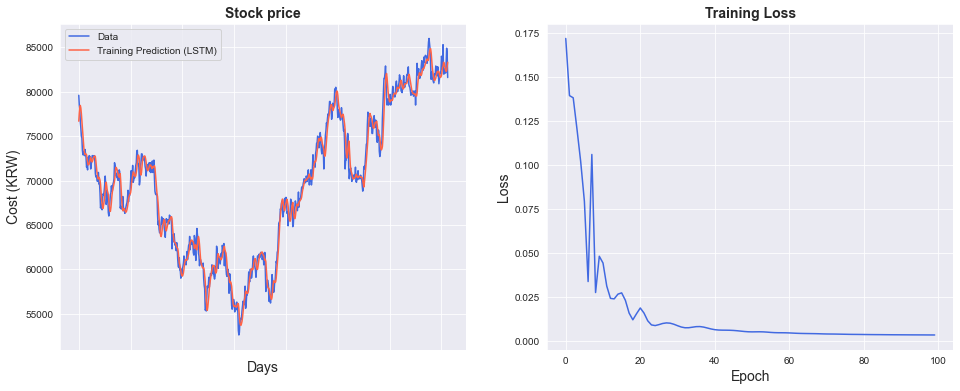

In [45]:
import seaborn as sns
sns.set_style("darkgrid")    

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (LSTM)", color='tomato')
ax.set_title('Stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (KRW)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

In [46]:
## metric 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


# rmse
def calculate_rmse(real, predict):
    real = np.array(real)
    predict = np.array(predict)
    RMSE = mean_squared_error(real, predict)**0.5
    return round(RMSE, 4)
    return RMSE

# rrmse
def calculate_rrmse(real, predict):
    real = np.array(real)
    predict = np.array(predict)
    Y_h = np.mean(real)
    RRMSE = np.sqrt(np.sum(np.square(predict - real)) / np.sum(np.square(Y_h - real)))
    #return round(RRMSE, 4)
    return RRMSE




# nrmse
def calculate_nrmse(real, predict):
    real = np.array(real)
    predict = np.array(predict)
    NRMSE = np.sqrt(np.mean(np.square(real - predict)))/np.mean(real)
    return round(NRMSE, 4)
    return NRMSE

# mae
def calculate_mae(real, predict):
    real = np.array(real)
    predict = np.array(predict)
    MAE = mean_absolute_error(real,predict)
    return round(MAE,4)
    return MAE 

#rsqr
def calculate_r2(real, predict):
    real = np.array(real)
    predict = np.array(predict)
    R2= r2_score(real,predict)
    return round(R2)
    return R2





In [47]:
# make predictions
y_test_pred = model(x_test)

# tensor.detach.numpy()
#y_train_pred = y_train_pred.detach().numpy()
#y_train = y_train_lstm.detach().numpy()
#y_test_pred = y_test_pred.detach().numpy()
#y_test = y_test_lstm.detach().numpy()

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_lstm.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_lstm.detach().numpy())




In [48]:
import math
'''
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
'''
lstm = []
#rmse
trainScore = calculate_rmse(y_train[:,0], y_train_pred[:,0])
print('Train Score: %.4f RMSE' % (trainScore))
testScore = calculate_rmse(y_test[:,0], y_test_pred[:,0])
print('Test Score: %.4f RMSE' % (testScore))
lstm.append(trainScore)
lstm.append(testScore)

#rrmse
trainScore = calculate_rrmse(y_train[:,0], y_train_pred[:,0])
print('Train Score: %.4f RRMSE' % (trainScore))
testScore = calculate_rrmse(y_test[:,0], y_test_pred[:,0])
print('Test Score: %.4f RRMSE' % (testScore))
lstm.append(trainScore)
lstm.append(testScore)

#nrmse
trainScore = calculate_nrmse(y_train[:,0], y_train_pred[:,0])
print('Train Score: %.4f NRMSE' % (trainScore))
testScore = calculate_nrmse(y_test[:,0], y_test_pred[:,0])
print('Test Score: %.4f NRMSE' % (testScore))
lstm.append(trainScore)
lstm.append(testScore)

#mae
trainScore = calculate_mae(y_train[:,0], y_train_pred[:,0])
print('Train Score: %.4f MAE' % (trainScore))
testScore = calculate_mae(y_test[:,0], y_test_pred[:,0])
print('Test Score: %.4f MAE' % (testScore))
lstm.append(trainScore)
lstm.append(testScore)

#r2
trainScore = calculate_r2(y_train[:,0], y_train_pred[:,0])
print('Train Score: %.4f R2' % (trainScore))
testScore = calculate_r2(y_test[:,0], y_test_pred[:,0])
print('Test Score: %.4f R2' % (testScore))
lstm.append(trainScore)
lstm.append(testScore)

lstm.append(training_time)

Train Score: 1198.0884 RMSE
Test Score: 1874.8493 RMSE
Train Score: 0.1491 RRMSE
Test Score: 0.1647 RRMSE
Train Score: 0.0172 NRMSE
Test Score: 0.0295 NRMSE
Train Score: 925.8250 MAE
Test Score: 1454.9984 MAE
Train Score: 1.0000 R2
Test Score: 1.0000 R2


In [49]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(price)
trainPredictPlot = np.array(price)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(price)
testPredictPlot[:, :] = np.nan
#testPredictPlot = np.array(price)
testPredictPlot[len(y_train_pred)+lookback-1:len(price)-1, :] = y_test_pred

original = scaler.inverse_transform(price['close'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

In [50]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='close (KRW)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'

)



annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Results (LSTM)',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()

In [52]:
# for blstm
input_dim = 1
hidden_dim = 32
num_layers = 1
output_dim = 1
num_epochs = 100

In [73]:
from torch.autograd import Variable
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split


# bidirecitional LSTM
class BiLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(BiLSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        # drop out???
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True,bidirectional = True)
        self.fc = nn.Linear(hidden_dim*2, output_dim)
        self.relu = nn.ReLU()
    def forward(self, x):
        #h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_dim).requires_grad_()
        #c0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_dim).requires_grad_()
        h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_dim).requires_grad_()
        #//out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        #//out = self.fc(out[:, -1, :]) 
        out,_ = self.lstm(x,(h0,c0))
        out = self.fc(out[:,-1,:])
        
        #out = self.relu(out)
        return out

In [74]:
model = BiLSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [75]:

hist = np.zeros(num_epochs)
start_time = time.time()

for t in range(num_epochs):
    #y_train_pred = model(x_train)
    y_train_pred = model.forward(x_train)
    optimiser.zero_grad()
    
    loss = criterion(y_train_pred, y_train_blstm)
    loss.backward()
    optimiser.step()
    
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()
    
    
    
training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.1675575226545334
Epoch  1 MSE:  0.14105477929115295
Epoch  2 MSE:  0.14371632039546967
Epoch  3 MSE:  0.13632355630397797
Epoch  4 MSE:  0.12003769725561142
Epoch  5 MSE:  0.10506542026996613
Epoch  6 MSE:  0.1035899892449379
Epoch  7 MSE:  0.1029612347483635
Epoch  8 MSE:  0.09290646761655807
Epoch  9 MSE:  0.08489356935024261
Epoch  10 MSE:  0.08094367384910583
Epoch  11 MSE:  0.07950970530509949
Epoch  12 MSE:  0.0849665105342865
Epoch  13 MSE:  0.08344610035419464
Epoch  14 MSE:  0.08591029793024063
Epoch  15 MSE:  0.08395073562860489
Epoch  16 MSE:  0.08056635409593582
Epoch  17 MSE:  0.07960288971662521
Epoch  18 MSE:  0.08077491074800491
Epoch  19 MSE:  0.08004728704690933
Epoch  20 MSE:  0.07860273867845535
Epoch  21 MSE:  0.07797064632177353
Epoch  22 MSE:  0.07800628244876862
Epoch  23 MSE:  0.07824728637933731
Epoch  24 MSE:  0.07842088490724564
Epoch  25 MSE:  0.07845088839530945
Epoch  26 MSE:  0.078374482691288
Epoch  27 MSE:  0.07827571779489517
Epoch  2

In [76]:

predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_blstm.detach().numpy()))

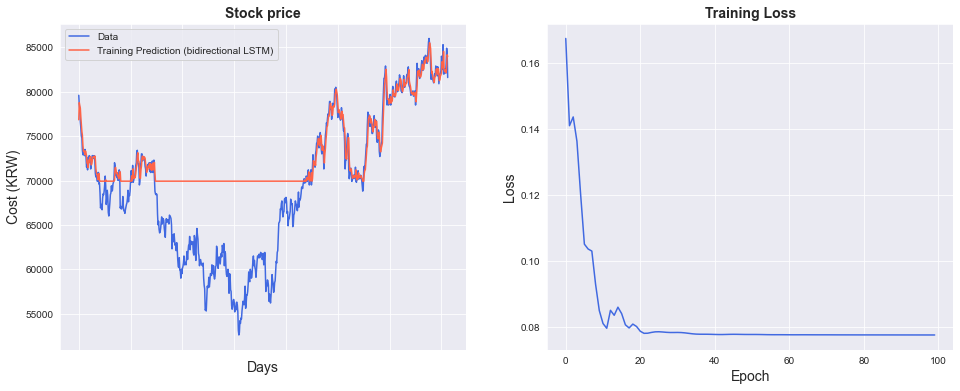

In [77]:
import seaborn as sns
sns.set_style("darkgrid")    

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (bidirectional LSTM)", color='tomato')
ax.set_title('Stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (KRW)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

In [31]:
import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_blstm.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_blstm.detach().numpy())



In [32]:
blstm=[]
#rmse
trainScore = calculate_rmse(y_train[:,0], y_train_pred[:,0])
print('Train Score: %.4f RMSE' % (trainScore))
testScore = calculate_rmse(y_test[:,0], y_test_pred[:,0])
print('Test Score: %.4f RMSE' % (testScore))
blstm.append(trainScore)
blstm.append(testScore)
#rrmse
trainScore = calculate_rrmse(y_train[:,0], y_train_pred[:,0])
print('Train Score: %.4f RRMSE' % (trainScore))
testScore = calculate_rrmse(y_test[:,0], y_test_pred[:,0])
print('Test Score: %.4f RRMSE' % (testScore))
blstm.append(trainScore)
blstm.append(testScore)
#nrmse
trainScore = calculate_nrmse(y_train[:,0], y_train_pred[:,0])
print('Train Score: %.4f NRMSE' % (trainScore))
testScore = calculate_nrmse(y_test[:,0], y_test_pred[:,0])
print('Test Score: %.4f NRMSE' % (testScore))
blstm.append(trainScore)
blstm.append(testScore)
#mae
trainScore = calculate_mae(y_train[:,0], y_train_pred[:,0])
print('Train Score: %.4f MAE' % (trainScore))
testScore = calculate_mae(y_test[:,0], y_test_pred[:,0])
print('Test Score: %.4f MAE' % (testScore))
blstm.append(trainScore)
blstm.append(testScore)
#r2
trainScore = calculate_r2(y_train[:,0], y_train_pred[:,0])
print('Train Score: %.4f R2' % (trainScore))
testScore = calculate_r2(y_test[:,0], y_test_pred[:,0])
print('Test Score: %.4f R2' % (testScore))
blstm.append(trainScore)
blstm.append(testScore)

blstm.append(training_time)


Train Score: 1012.4513 RMSE
Test Score: 1479.4894 RMSE
Train Score: 0.1137 RRMSE
Test Score: 0.1699 RRMSE
Train Score: 0.0145 NRMSE
Test Score: 0.0243 NRMSE
Train Score: 772.9106 MAE
Test Score: 1111.0706 MAE
Train Score: 1.0000 R2
Test Score: 1.0000 R2


In [33]:
lstm = pd.DataFrame(lstm, columns=['LSTM'])
blstm = pd.DataFrame(blstm, columns=['BD-LSTM'])
result = pd.concat([lstm, blstm], axis=1, join='inner')
result.index = ['Train RMSE', 'Test RMSE','Train RRMSE', 'Test RRMSE','Train NRMSE', 'Test NRMSE', 'Train MAE', 'Test MAE','Train R2', 'Test R2','Train Time']
result

,LSTM,BD-LSTM
Train RMSE,1301.213000,1012.451300
Test RMSE,2084.240300,1479.489400
Train RRMSE,0.146068,0.113653
Test RRMSE,0.239375,0.169920
Train NRMSE,0.018600,0.014500
Test NRMSE,0.034300,0.024300
Train MAE,997.723511,772.910583
Test MAE,1643.715942,1111.070557
Train R2,1.000000,1.000000
Test R2,1.000000,1.000000


In [28]:
lstm

,LSTM
